In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1')
# Keeping necessary columns and renaming them
df = df[['v1', 'v2']]
df.columns = ['label', 'text']


In [ ]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

,0
label,0
text,0


In [ ]:
# Converting 'ham' to 0 and 'spam' to 1
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
#TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Transformiing the text column
x = tfidf.fit_transform(df['text'])
# Target column
y = df['label_num']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Training  the model
model = LogisticRegression()
model.fit(x_train, y_train)

# Model Prediction
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9488789237668162
Confusion Matrix:
 [[962   3]
 [ 54  96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.64      0.77       150

    accuracy                           0.95      1115
   macro avg       0.96      0.82      0.87      1115
weighted avg       0.95      0.95      0.94      1115



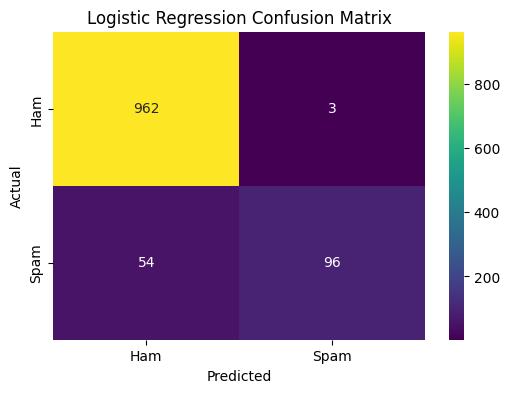

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

###EVALUTION OF THIS LOGISTIC MODEL
Here by looking at the confusion matrix and classification report logistic model we can see that it is doing great job in recognizing ham but it can't perform well on spam.
Out of 150 spam messages only 96 were predicted correctly.

This can happen due to imbalanced Dataset. Ham messages are far more than spam, model learns more about ham.


###NAIVE BAYES MODEL
Here we can use naive bayes model for better detection of ham and spam and then we can compare both model and tell which one performs better.

In [ ]:
x_train, x_test, y_train, y_test

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 32037 stored elements and shape (4457, 5000)>,
 <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 8037 stored elements and shape (1115, 5000)>,
 1978    0
 3989    1
 3935    0
 4078    0
 4086    1
        ..
 3772    0
 5191    0
 5226    0
 5390    0
 860     0
 Name: label_num, Length: 4457, dtype: int64,
 3245    0
 944     0
 1044    1
 2484    0
 812     1
        ..
 4264    0
 2439    0
 5556    0
 4205    0
 4293    1
 Name: label_num, Length: 1115, dtype: int64)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred_nb = nb_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9748878923766816
Confusion Matrix:
 [[965   0]
 [ 28 122]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



###EVALUATING NAIVE BAYES MODEL
This model correctly identified all 965 ham messeges but misclassified 28 spam as ham but it still performs better than previous model.


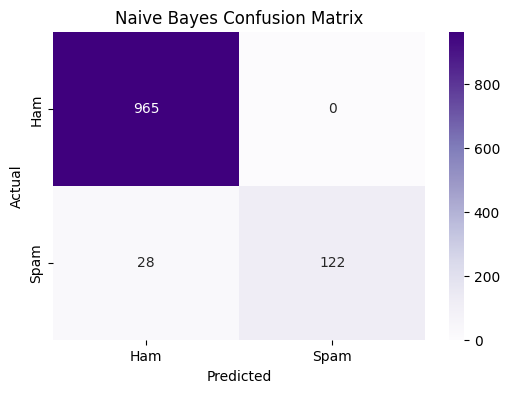

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap= "Purples", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

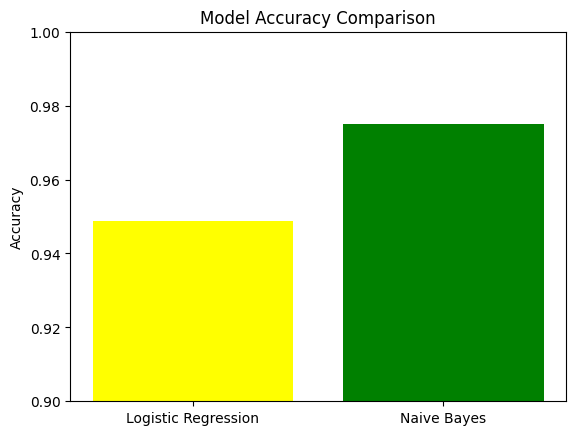

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Accuracy scores
acc_lr = accuracy_score(y_test, y_pred)
acc_nb = accuracy_score(y_test, y_pred_nb)

models = ['Logistic Regression', 'Naive Bayes']
scores = [acc_lr, acc_nb]

plt.bar(models, scores, color=['yellow', 'green'])
plt.ylim(0.9, 1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

###CONCLUSION
As we can see the comparison between accuracy  of these two models naive bayes performs better than logistic.